In [1]:
# Setup code for the notebook
#%matplotlib notebook
# Autoreload external python modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [48]:
import ipytools
import data_loader
import visualization

# Get images from the video 

In [37]:
folders = data_loader.retrieve_video()

892 images


In [74]:
# Chose a pair of images
i, j = 0, 100
images_name = data_loader.choose_video(folders, [i, j])

# Get Triplets

In [13]:
folders = data_loader.retrieve_triplets()

In [20]:
# Chose a pair of images
d = 2
i = 11
indices = ['1107', '1148']#, '1231']
images_name = data_loader.choose_triplets(folders, d, i, indices)

# Visualize chosen images

Dimension:  (1080, 2560, 1)
Dimension:  (1080, 2560, 1)



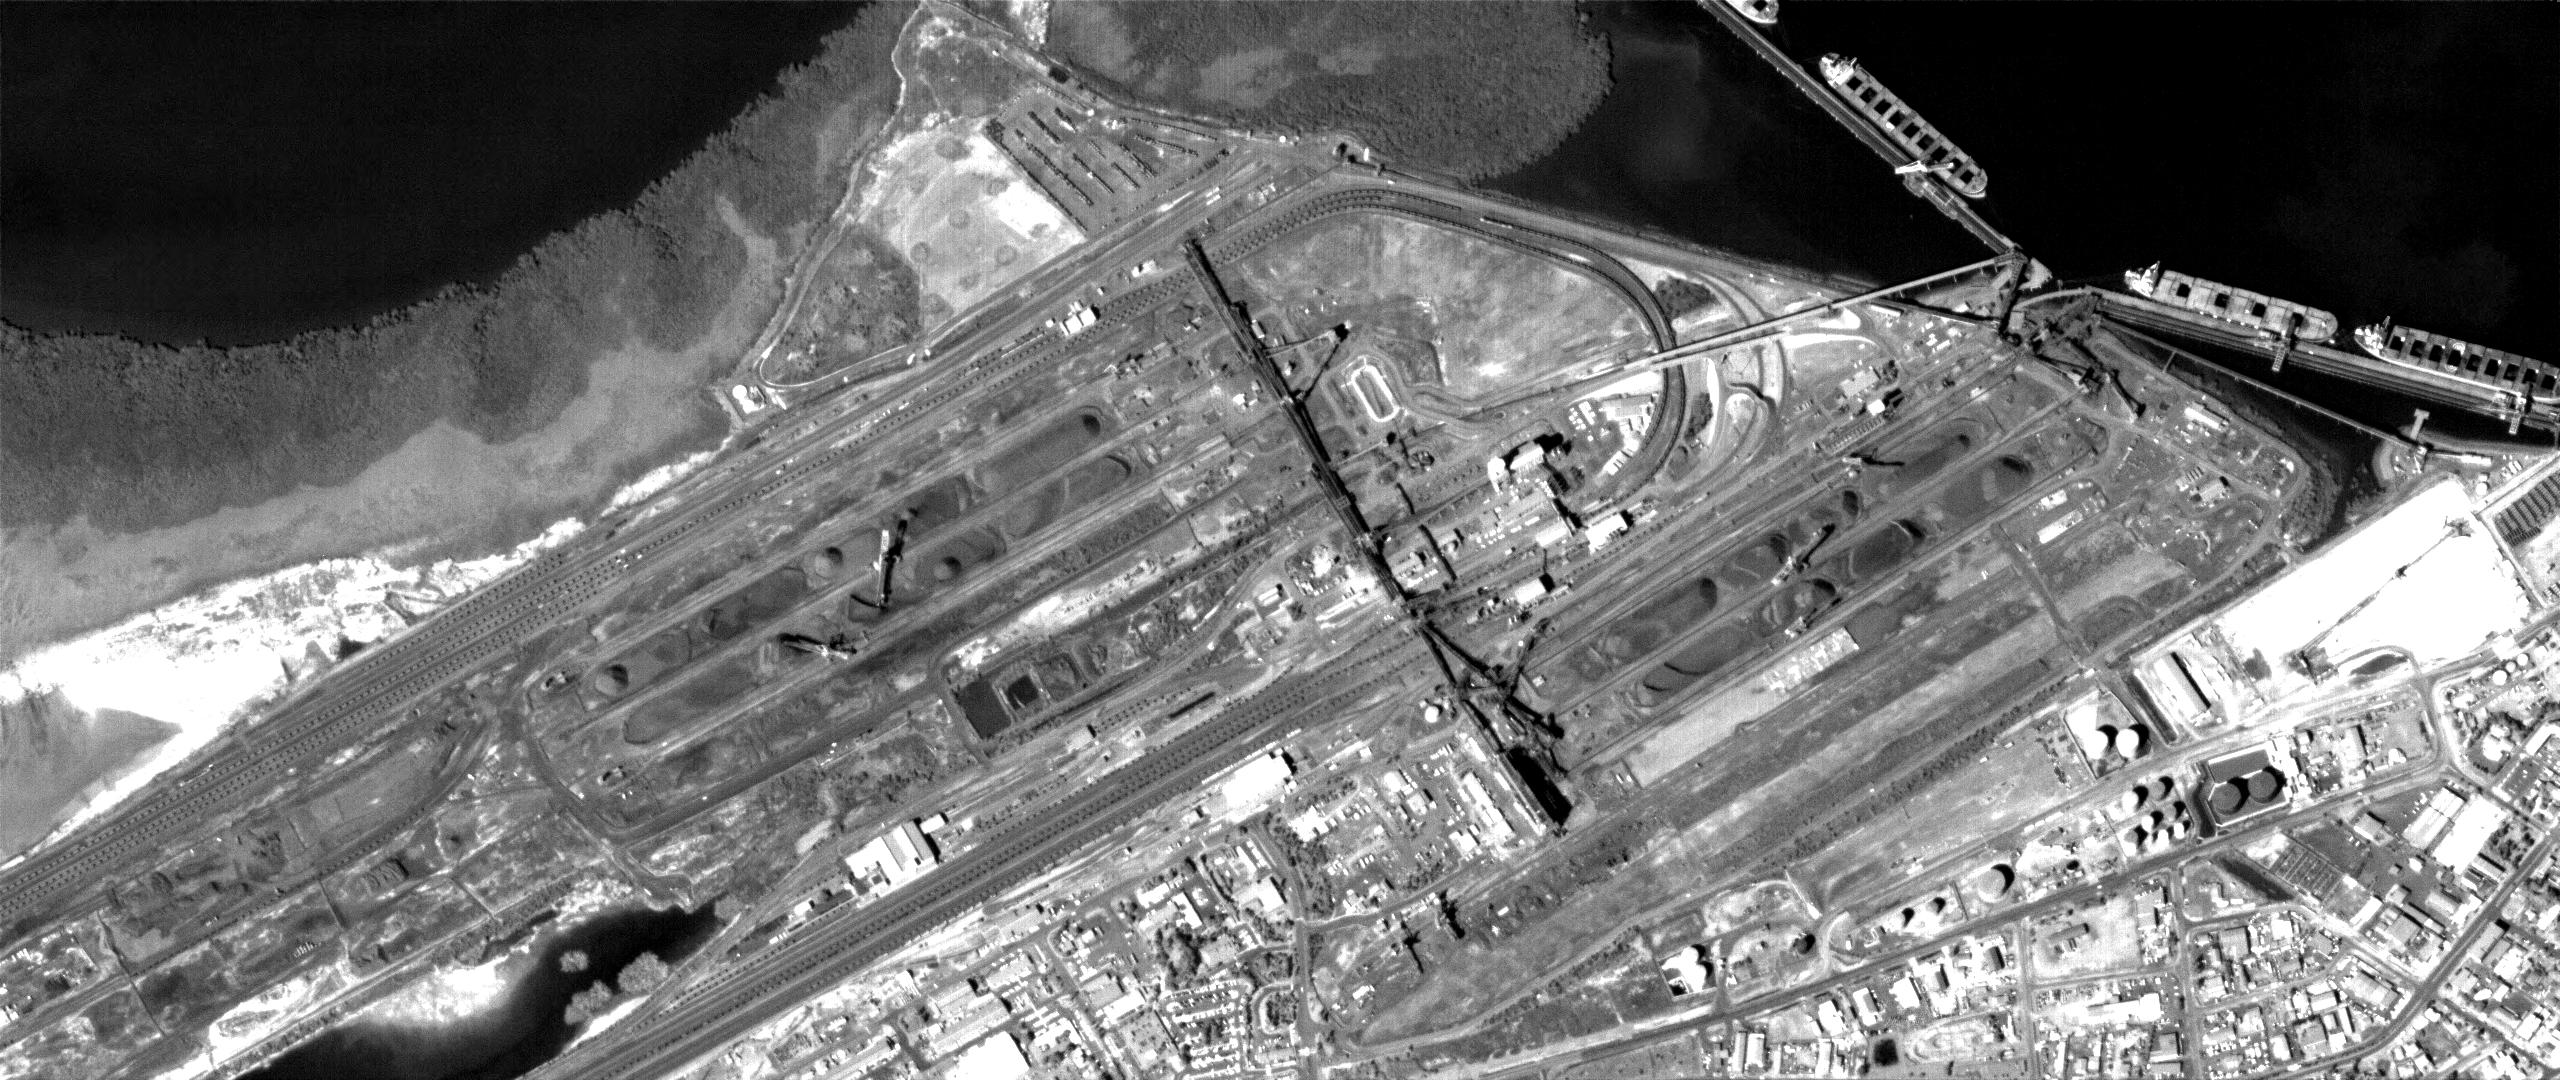
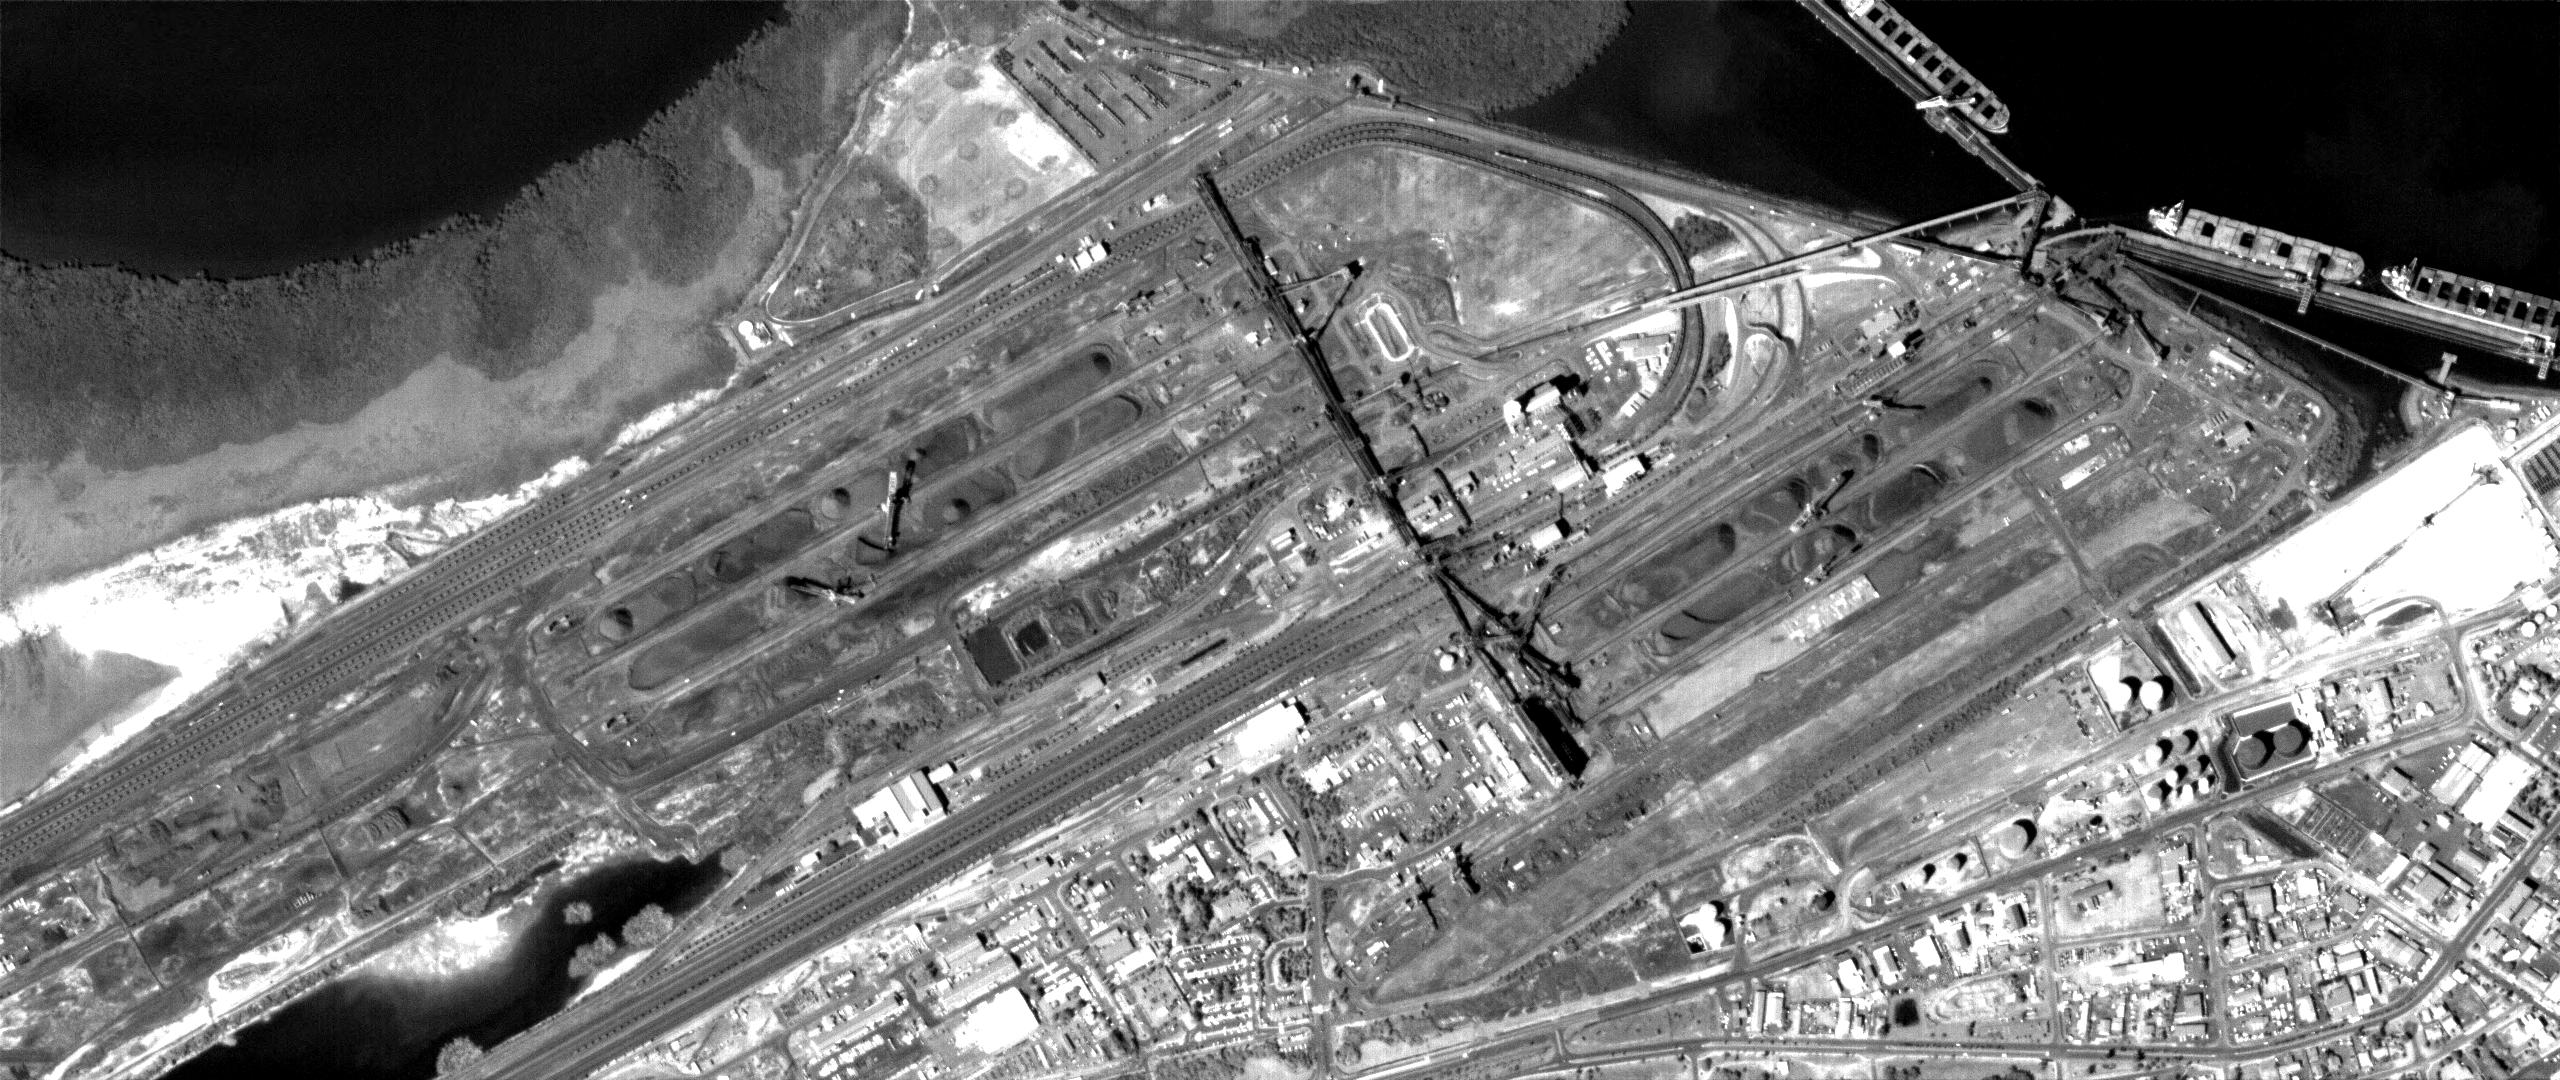

In [75]:
data_loader.display_images(images_name)

In [76]:
roi = {
    "x": 0,
    "y": 0,
    "w": 1000,
    "h": 1000
  }

Dimension:  (1000, 1000, 1)
Dimension:  (1000, 1000, 1)



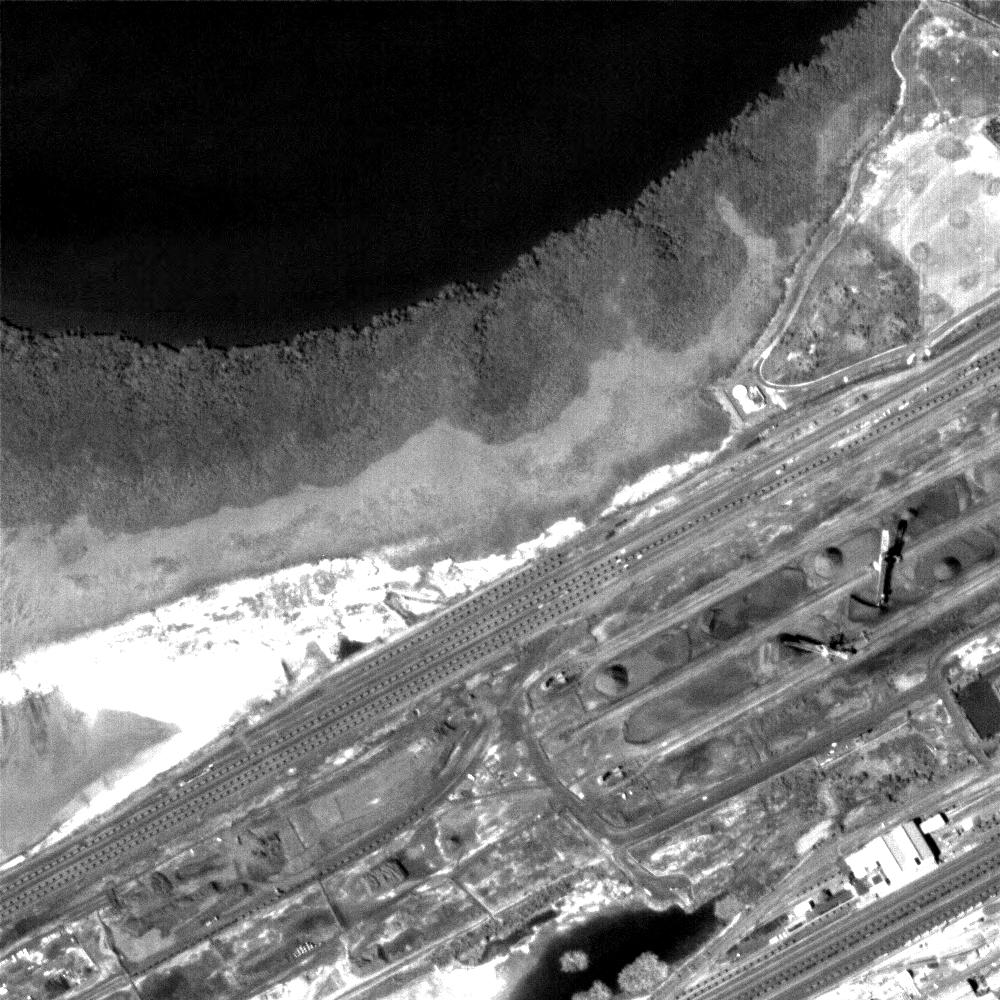
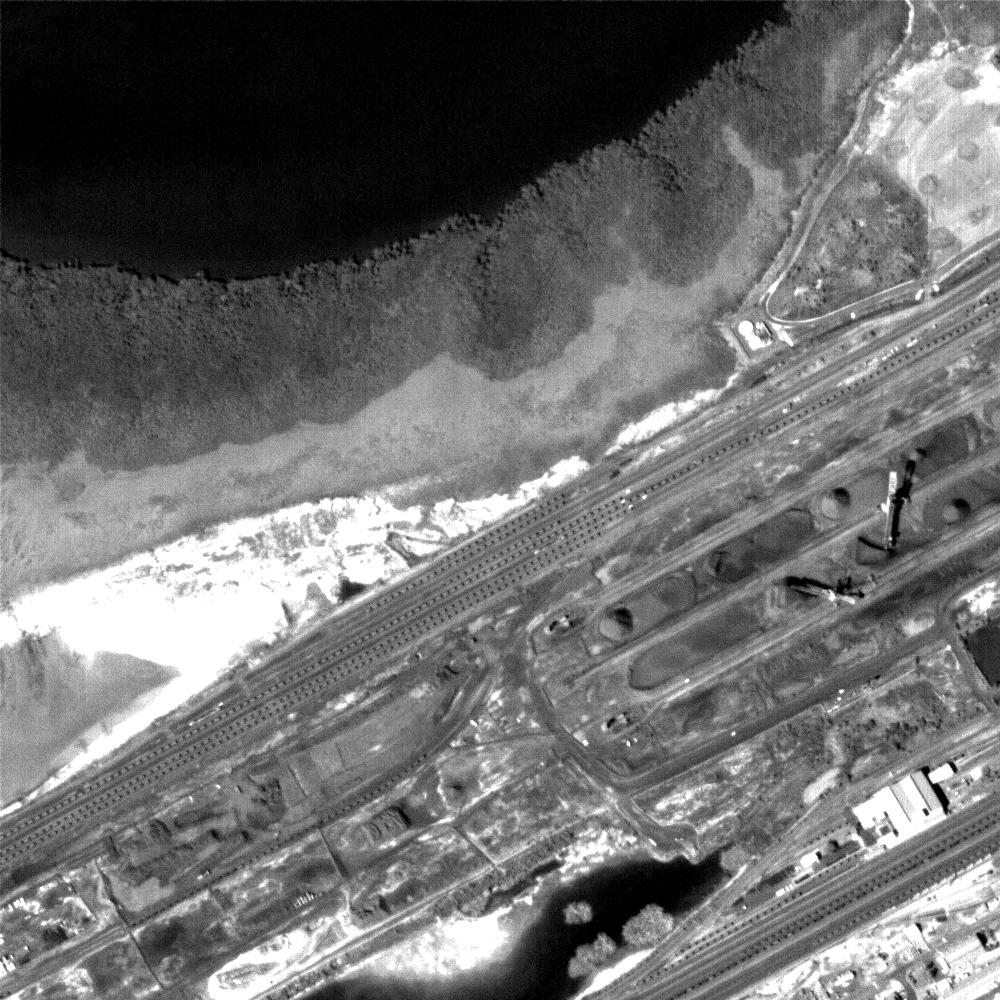

TypeError: 'NoneType' object is not iterable

In [77]:
l,g = data_loader.display_images(images_name, roi)

In [78]:
data_loader.write_json(images_name, roi)

# Execution of s2p on Plantet's data

In [79]:
!rm -rf output && cd .. && python3 s2p.py yaw_extension/config.json

out_dir is: /Users/juleskozolinsky/Projets/s2p/yaw_extension/./output
tile size: 1000 1000
total number of tiles: 1 (1 x 1)

discarding masked tiles...
done 1 / 1 tiles
Elapsed time: 0:00:00.187840

correcting pointing locally...
correcting pointing on tile 0 0 pair 1...

RUN: sift_roi /Users/juleskozolinsky/Projets/s2p/yaw_extension/../data/s02_20150507T020554Z/video_frames/s02_20150507T02055427Z.tif 0 0 1000 1000 --thresh-dog 0.013300 -o /tmp/s2p_ryi7ou6r.txt
0:00:02.202046

RUN: sift_roi /Users/juleskozolinsky/Projets/s2p/yaw_extension/../data/s02_20150507T020554Z/video_frames/s02_20150507T02055760Z.tif -37 -109 1013 1036 --thresh-dog 0.013300 -o /tmp/s2p_4u933jh3.txt
0:00:01.155083

RUN: matching /tmp/s2p_ryi7ou6r.txt /tmp/s2p_4u933jh3.txt -relative 0.600000 -o /tmp/s2p_jcaw0tl6.txt -f "-0.7000752056690308 -0.05700340423666002 0.7093675955683442 0.0586765086766594 -32.18369954885975"
20 matches
0:00:00.528399

RUN: ransac fmn 1000 .3 7 /tmp/s2p_jcaw0tl6.txt < /tmp/s2p_jcaw0tl6.txt


In [80]:
tiles_path = visualization.get_tiles_path()
print(tiles_path)
tile_path = tiles_path[0]

['./output/tiles/row_0000000_height_1000/col_0000000_width_1000/pair_1']


# Retrieve computed values

In [81]:
im_list = visualization.get_images()
im1 = im_list[0]
im2 = im_list[1]

../data/s02_20150507T020554Z/video_frames/s02_20150507T02055427Z.tif
../data/s02_20150507T020554Z/video_frames/s02_20150507T02055760Z.tif


In [82]:
m = visualization.get_matches(tile_path)
F = visualization.get_affine_fundamental_matrix(tile_path)
A = visualization.get_correction_matrix(tile_path)
print(A)

[[ 9.99996166e-01 -2.76913161e-03 -1.12869690e-05]
 [ 2.76913161e-03  9.99996166e-01 -9.09920000e-07]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


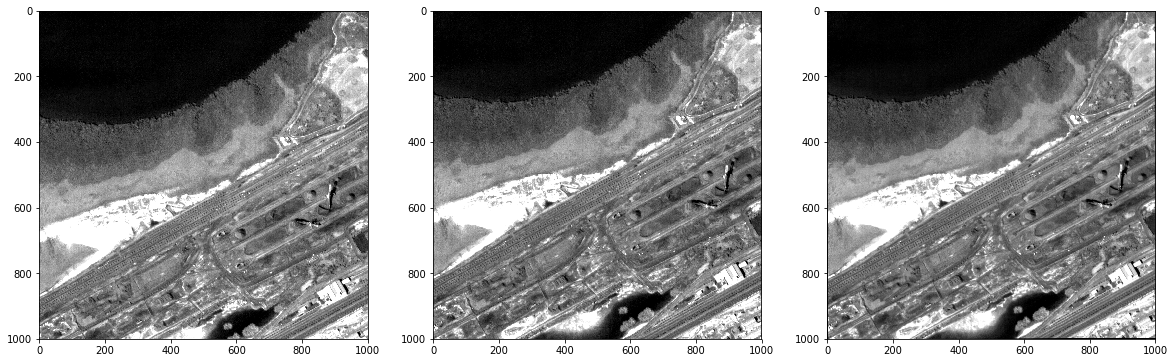

In [83]:
im2_corrected = visualization.visualize_transformation(im1, im2, A)

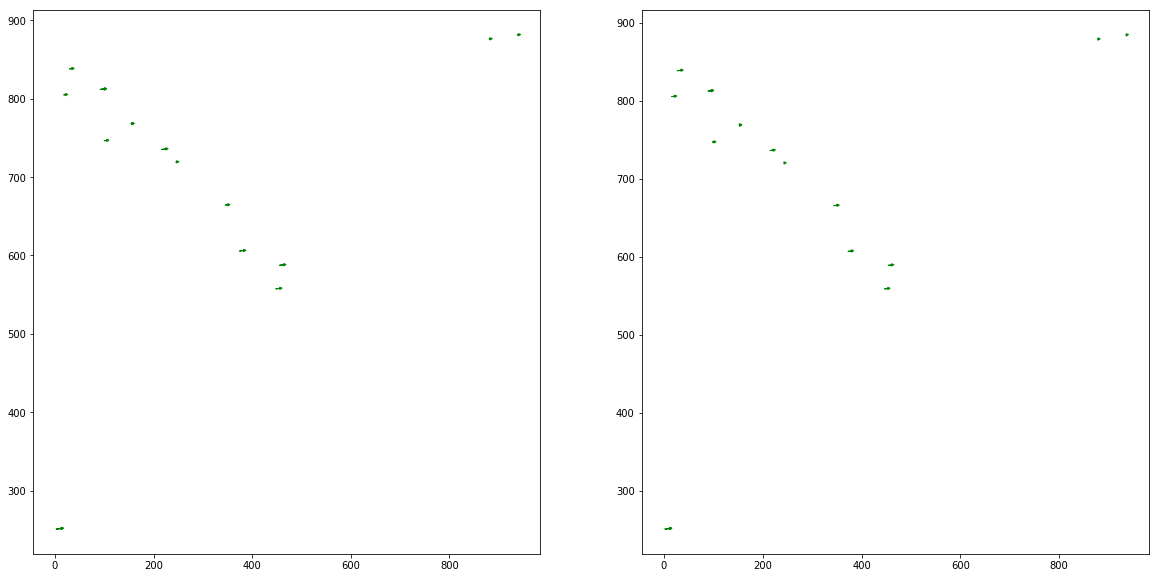

In [84]:
visualization.visualize_pointing_error(F, m, A)

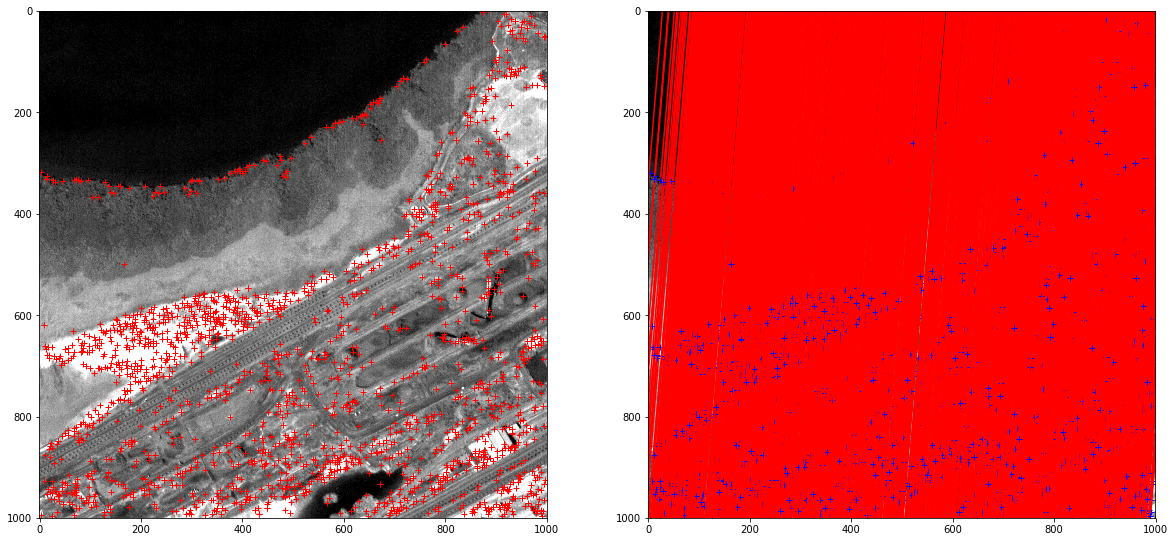

In [54]:
visualization.visualize_epipolar(im1, im2, F, m)


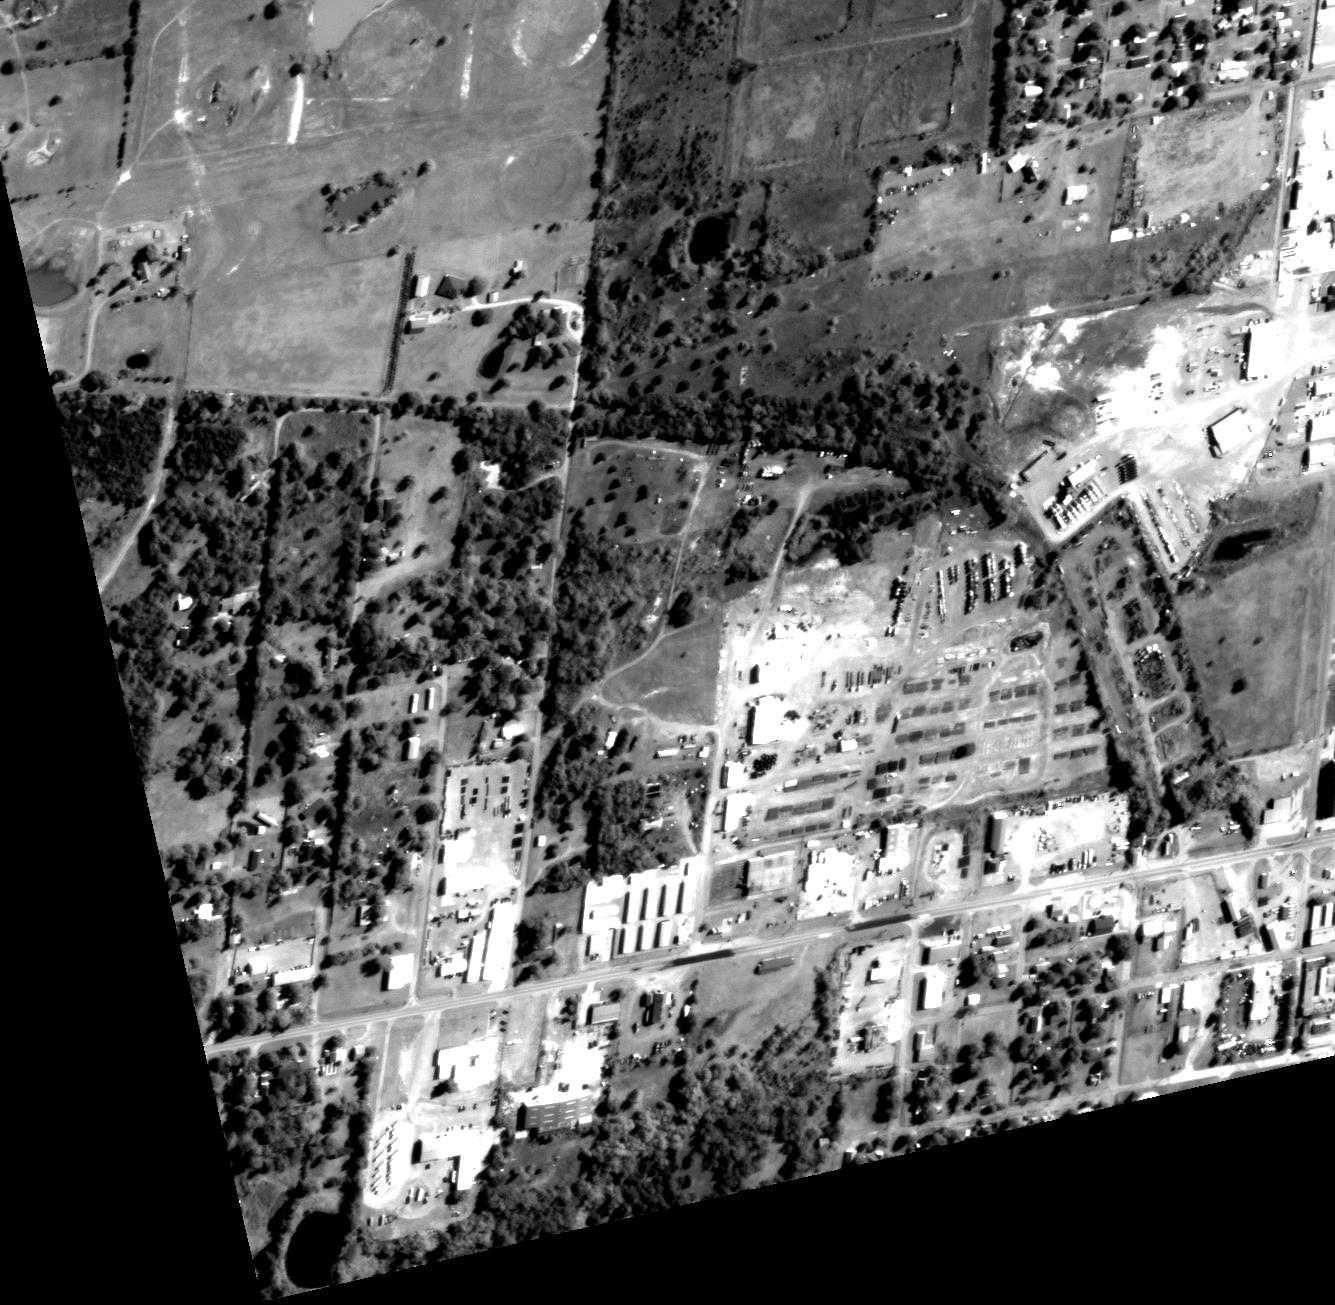
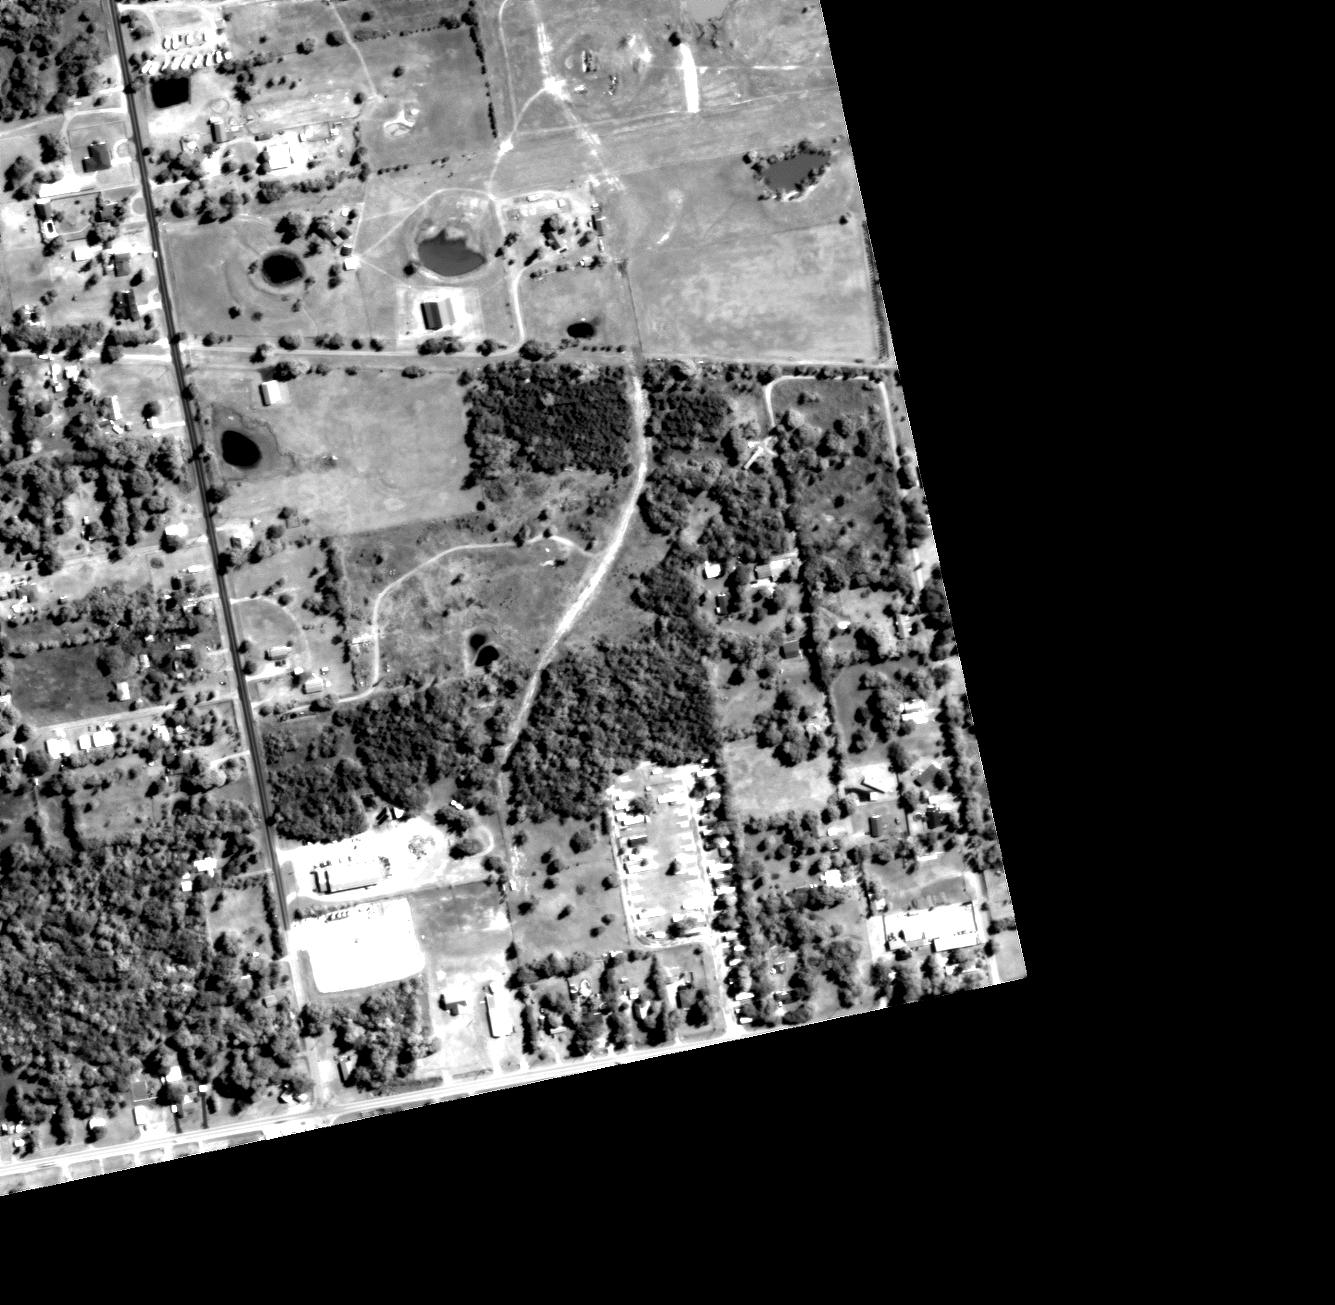

In [258]:
a_ref = key + '/rectified_ref.tif'
a_sec = key + '/rectified_sec.tif'
ipytools.display_gallery([ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_ref)), ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_sec))])

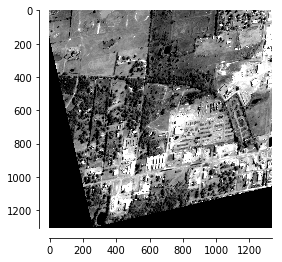

In [219]:
ipytools.display_imshow(ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_ref)))

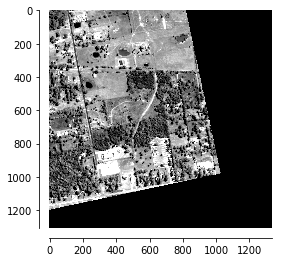

In [220]:
ipytools.display_imshow(ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_sec)))

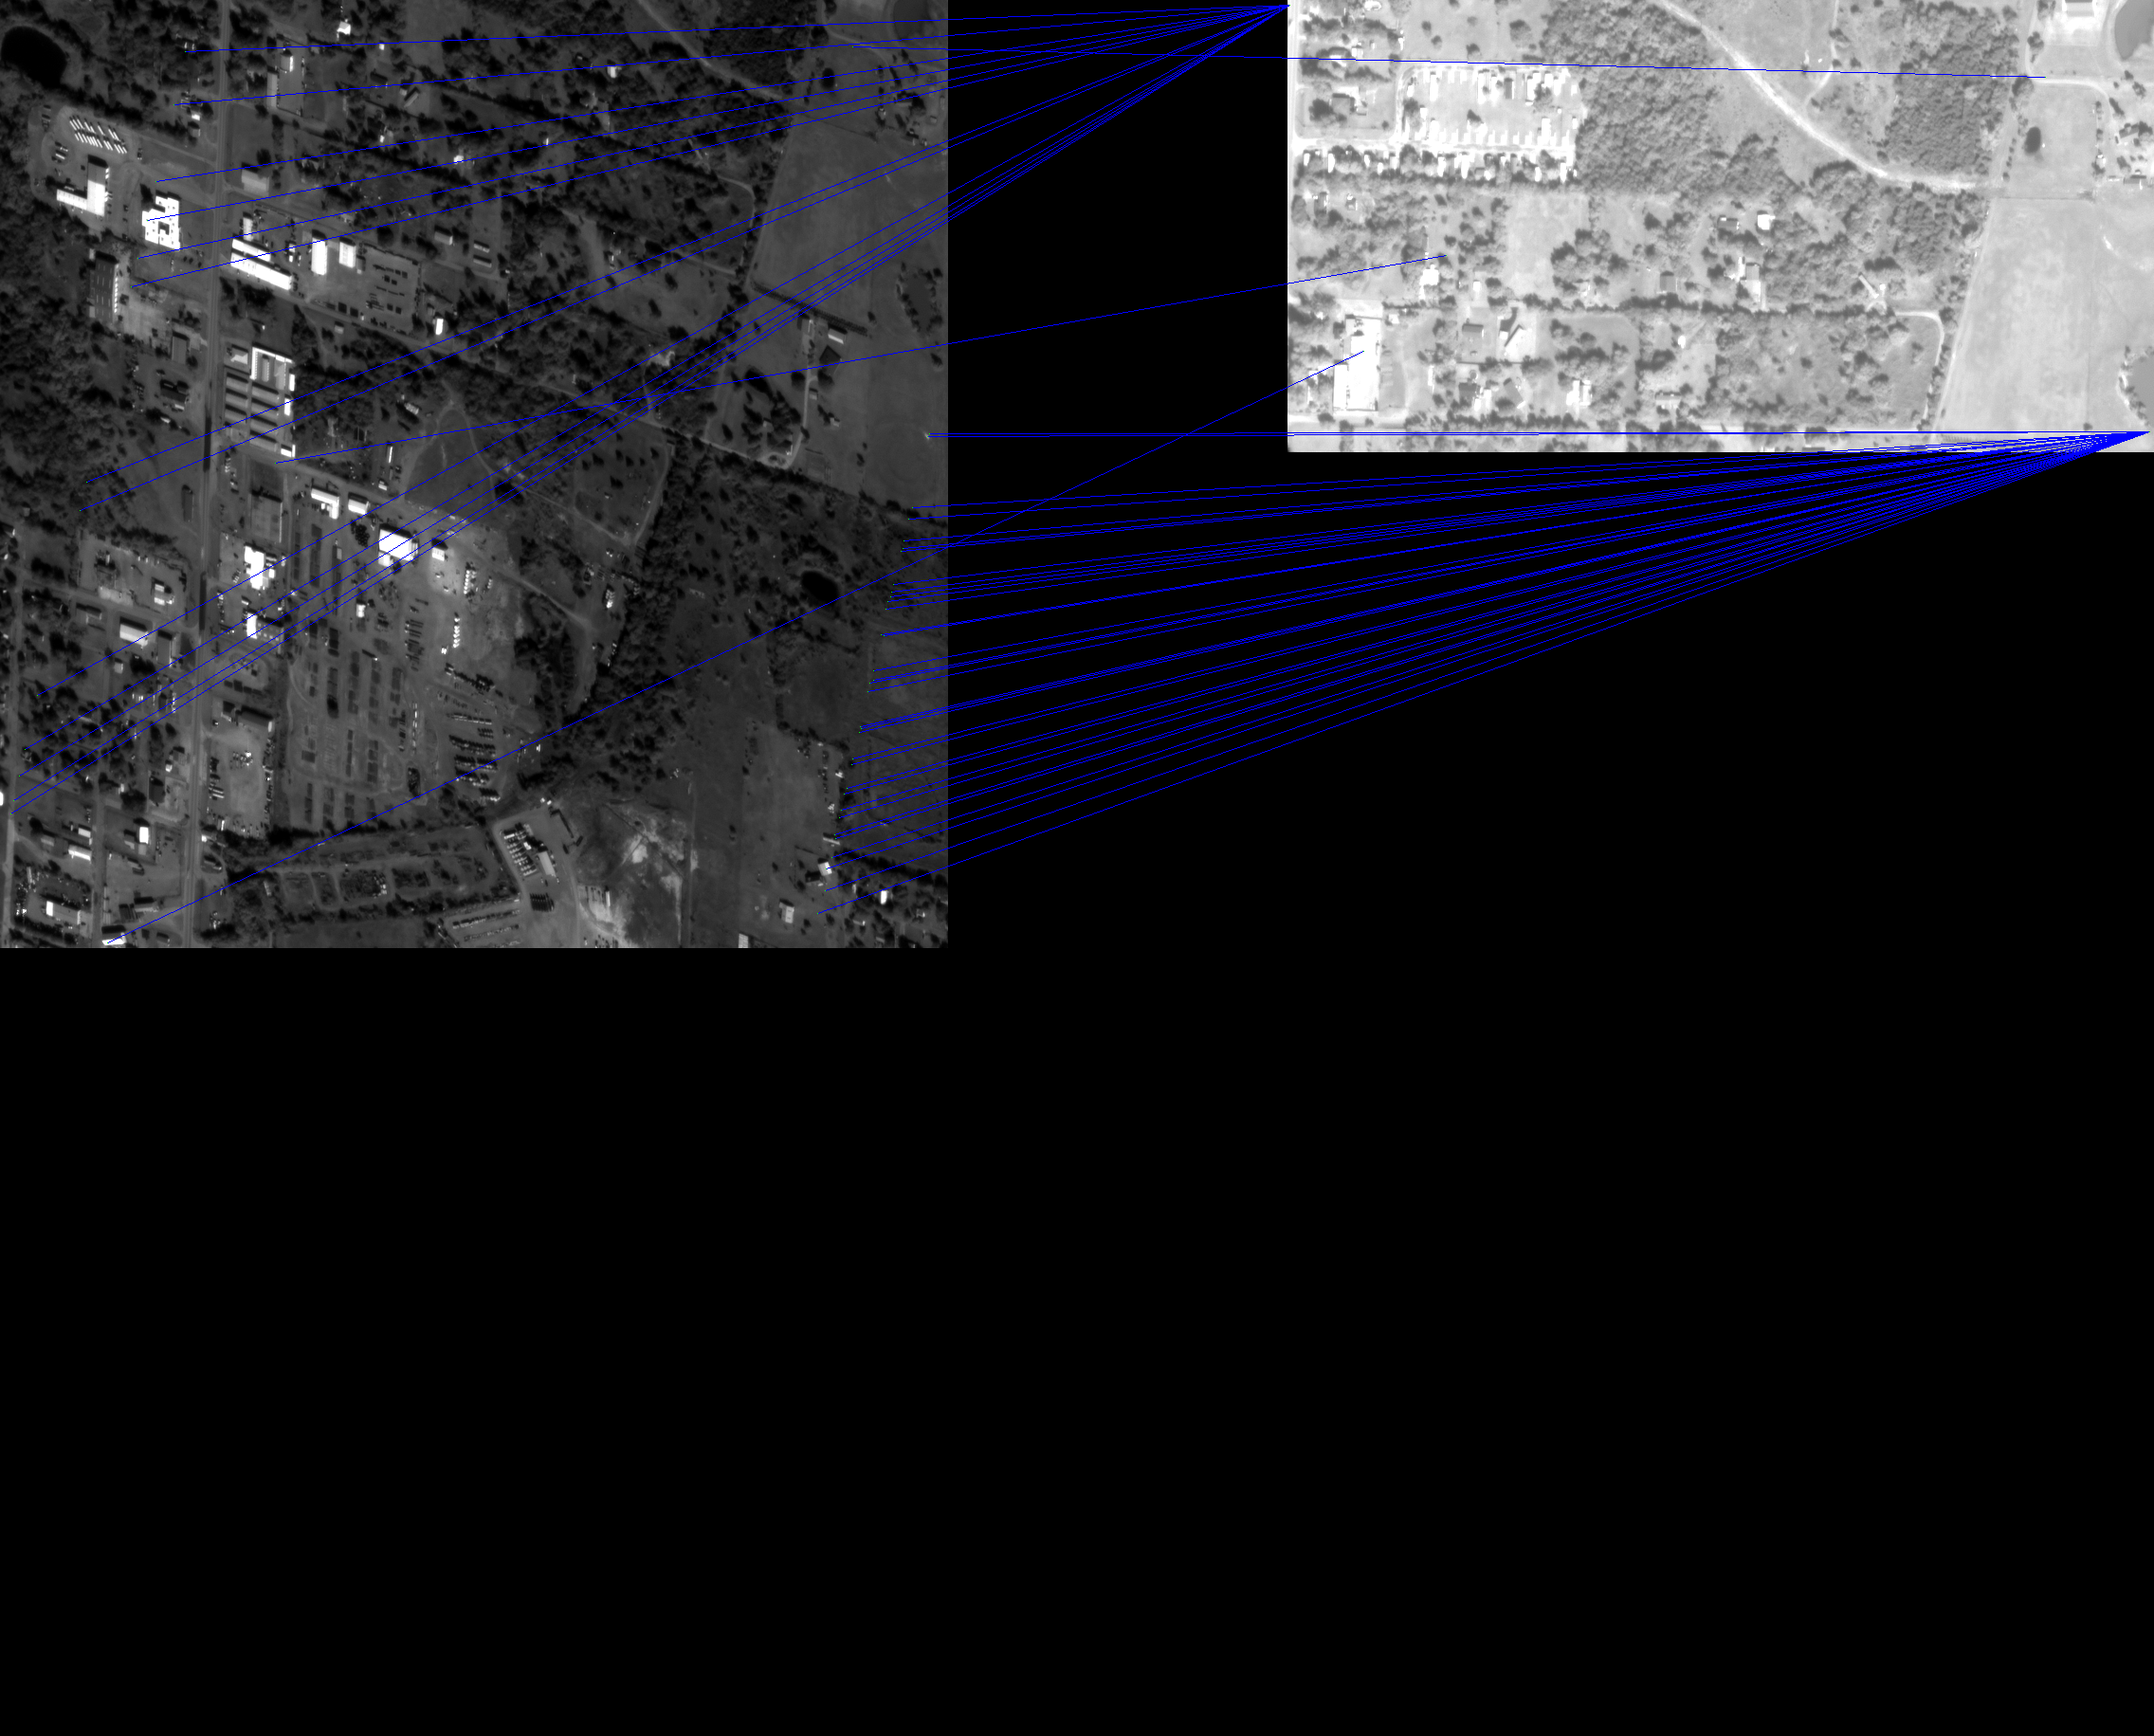

In [221]:
from IPython.display import Image
filename = key + '/sift_matches_pointing.png'
Image(filename=filename) 

In [106]:
expected_output = './output/s03_20161003T161107Z/dsm.tif'
a = readGTIFF(expected_output)

RasterioIOError: ./output/s03_20161003T161107Z/dsm.tif: No such file or directory

<IPython.core.display.Javascript object>


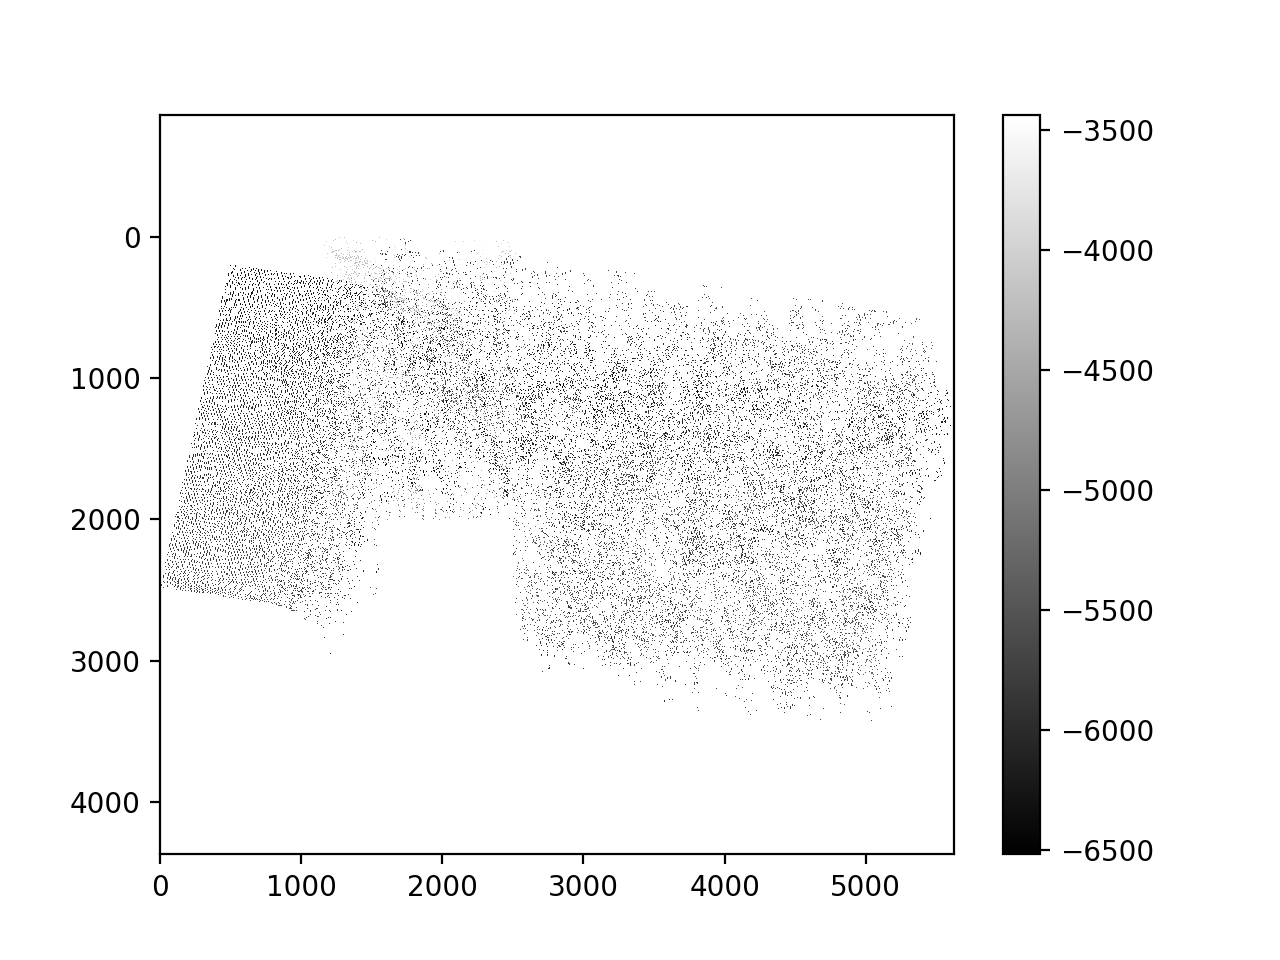

In [18]:
b = a#readGTIFF('/Users/juleskozolinsky/Projets/s2p/yaw_extension/output/s03_20161003T161107Z/tiles/row_0000000_height_500/col_0001000_width_500/dsm.tif')
display_imshow(b)